# Décodage des **flottants** en *Python*

---

Fonction permettant de convertir un code binaire sur `1+Ne+Nm` bits en *float*, en respectant la norme [*IEEE 754*](https://fr.wikipedia.org/wiki/IEEE_754)
- `1` bit de signe
- `Ne` bits d'exposant biaisé
- `Nm` bits de mantisse

In [1]:
# Version 1

def bin2float(s:str, e:str, m:str) -> float:
    if '0' not in e: # nan ou inf
        if '1' not in m: # inf
            return float('inf') if s == '0' else float('-inf')
        else:
            return float('nan')
    else:
        signe = 1 if s == '0' else -1
        biais = 2**(len(e)-1) - 1
        expo = int(e, 2) - biais
        if '1' not in e: # dénormalisé
            mant = 0 + int(m, 2) / 2**len(m)
            return signe * mant * 2**(expo+1)
        else: # normalisé
            mant = 1 + int(m, 2) / 2**len(m)
            return signe * mant * 2**expo

Vérification :

In [2]:
# Exemples de flottants codé sur 8 bits (minifloat)
print(bin2float('0', '1111', '000'))
print(bin2float('1', '1111', '000'))
print(bin2float('0', '1111', '001'))
print(bin2float('0', '0000', '000'))
print(bin2float('0', '0000', '001'))
print(bin2float('0', '0001', '000'))
print(bin2float('0', '1110', '111'))

# Exemple d'un flottant codé sur 16 bits (half-precision)
print(bin2float('0', '10111', '0001010001'))

inf
-inf
nan
0.0
0.001953125
0.015625
240.0
276.25


In [3]:
# Version 2

def bin2float2(code:str, Ne: int) -> float:
    return bin2float(code[0], code[1:Ne+1], code[Ne+1:])

Vérification :

In [4]:
# Exemple d'un flottant codé sur 8 bits (minifloat)

print(bin2float2('00001000', 4)) # exposant sur 4 bits, donc mantisse sur 3 bits

0.015625


---

Affichage des 256 [*minifloats*](https://en.wikipedia.org/wiki/Minifloat)

In [5]:
# Création de la liste des 256 minifloats

minifloats = [bin2float2(f'{n:08b}', 4) for n in range(256)]

print(minifloats)

[0.0, 0.001953125, 0.00390625, 0.005859375, 0.0078125, 0.009765625, 0.01171875, 0.013671875, 0.015625, 0.017578125, 0.01953125, 0.021484375, 0.0234375, 0.025390625, 0.02734375, 0.029296875, 0.03125, 0.03515625, 0.0390625, 0.04296875, 0.046875, 0.05078125, 0.0546875, 0.05859375, 0.0625, 0.0703125, 0.078125, 0.0859375, 0.09375, 0.1015625, 0.109375, 0.1171875, 0.125, 0.140625, 0.15625, 0.171875, 0.1875, 0.203125, 0.21875, 0.234375, 0.25, 0.28125, 0.3125, 0.34375, 0.375, 0.40625, 0.4375, 0.46875, 0.5, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 36.0, 40.0, 44.0, 48.0, 52.0, 56.0, 60.0, 64.0, 72.0, 80.0, 88.0, 96.0, 104.0, 112.0, 120.0, 128.0, 144.0, 160.0, 176.0, 192.0, 208.0, 224.0, 240.0, inf, nan, nan, nan, nan, nan, nan, nan, -0.0, -0.001953125, -0

---

Graphique de la répartitions des *minifloats **positifs***

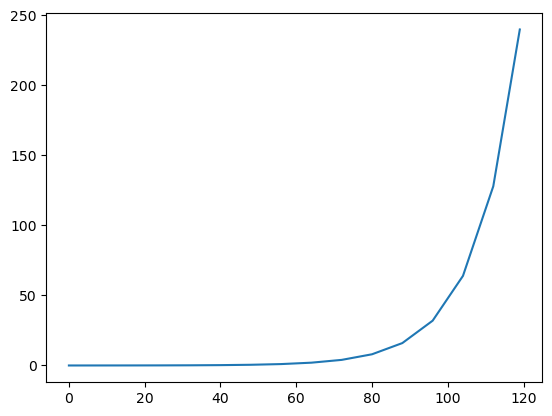

In [6]:
# Graphique

from matplotlib import pyplot

minifloats = [bin2float2(f'{n:08b}', 4) for n in range(0, int('01110111', 2)+1)] # jusqu'au dernier positif

pyplot.plot(minifloats)

---

## Bonus :

Zoom affichant les premiers flottants

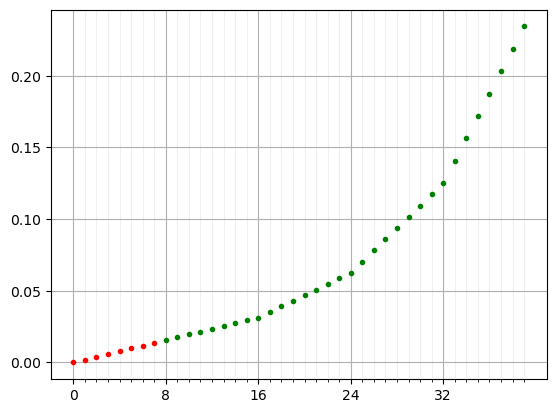

In [7]:
# Zoom illustrant les premiers flottants:

codemax = 40

subnormaux =[bin2float2(f'{n:08b}', 4) for n in range(8)]
normaux = [bin2float2(f'{n:08b}', 4) for n in range(8, codemax)]

fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)

major_ticks = range(0, codemax, 8)
minor_ticks = range(0, codemax, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=1)

ax.plot(range(8), subnormaux, linestyle='', marker='.', color='red')
ax.plot(range(8, codemax), normaux, linestyle='', marker='.', color='green')

On constate que les 8 premiers flottants, du type **dénormalisé** (points <span style="color:red">**rouges**</span>), permettent de coder **zéro**, tout en gardant une continuité avec les nombres **normalisés** (points <span style="color:green">**verts**</span>).

---

*fin du notebook*